# Assignment on Classification
Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

___
# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isna().sum() #Checking for null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Groupwise Mean of different features

In [8]:
data.groupby(by = 'Classification').mean()

,SL,SW,PL,PW
Classification,,,,
Iris-setosa,5.008511,3.408511,1.468750,0.244
Iris-versicolor,5.925000,2.781250,4.252083,1.326
Iris-virginica,6.616667,2.967347,5.547917,2.026


## Removing Duplicate Values

In [9]:
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
data.drop_duplicates(inplace = True)
data[data.duplicated()]

,SL,SW,PL,PW,Classification


In [11]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

## Pairplots of the different features classified by type of plant

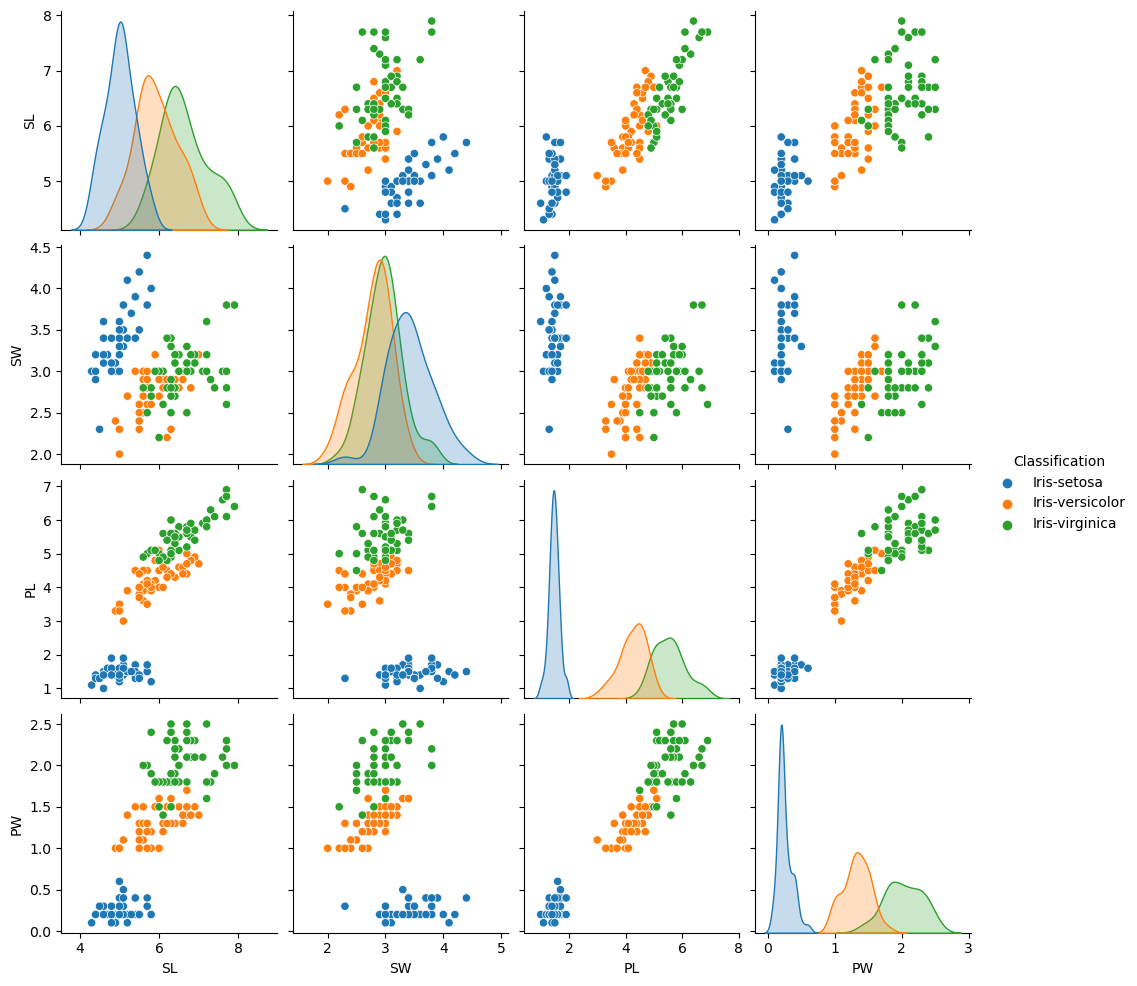

In [12]:
sns.pairplot(data, hue = 'Classification')
plt.show()

## Plotting heatmap of Correlation matrix

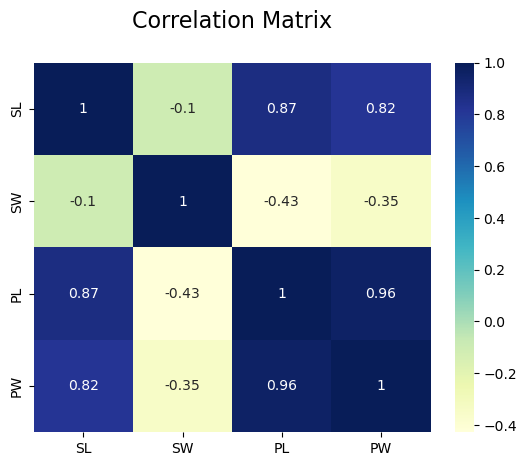

In [13]:
corrmatrix = data.corr(numeric_only = True)
sns.heatmap(corrmatrix, annot = True, cmap = 'YlGnBu')
plt.title("Correlation Matrix\n", size = 16)
plt.show()

### Insights
- At least one category (Iris-Setosa) is linearly separable from others
- Other two have overlapping features
- Data had some duplicate values, they were removed
- The features PL and PW are highly correlated (96% correlation). So, one of them can be dropped if needed
- The features have values generally in the same range. But scaling might give better results for the model

## Managing Null Values

In [14]:
for i in ['SL', 'SW', 'PL']:
    data[i].fillna(data[i].mean(), inplace = True)

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Checking for Outliers

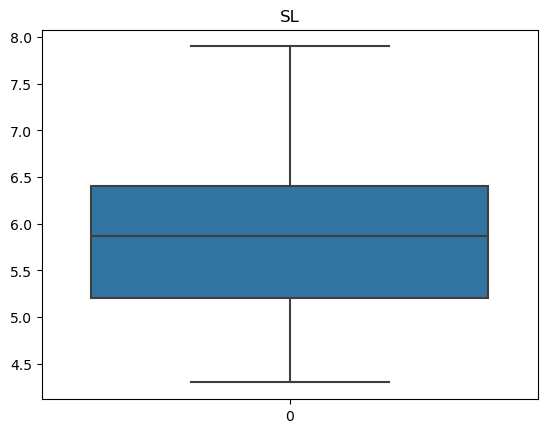

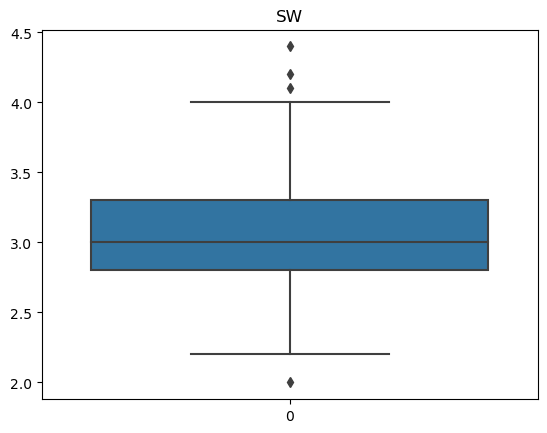

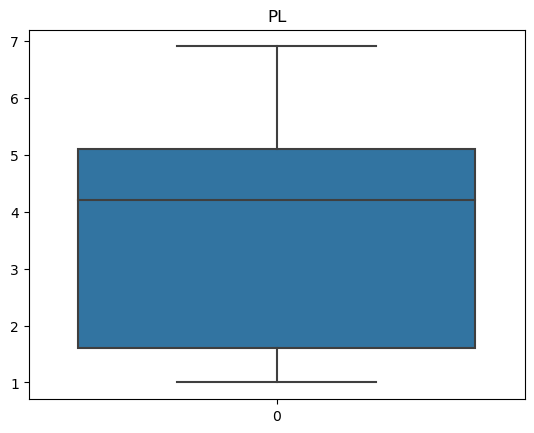

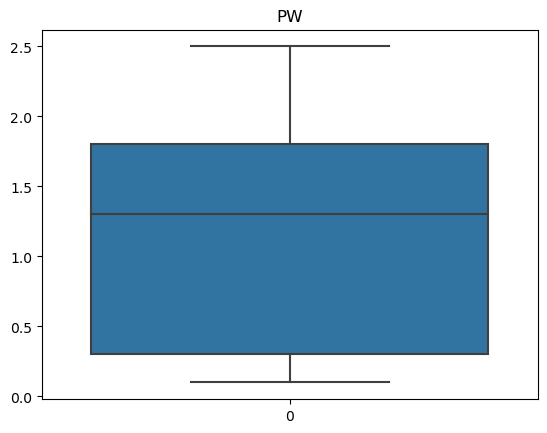

In [16]:
for i in data.select_dtypes('float').columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

<b>4 Outliers are present in SW column</b>

## Removing Outliers

In [17]:
Q1=data['SW'].quantile(0.25)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit, lower_limit)

4.05 2.05


In [18]:
outliers = data.loc[(data['SW'] > upper_limit) | (data['SW'] < lower_limit), 'SW'].index
print(data.loc[outliers])

     SL   SW   PL   PW   Classification
15  5.7  4.4  1.5  0.4      Iris-setosa
32  5.2  4.1  1.5  0.1      Iris-setosa
33  5.5  4.2  1.4  0.2      Iris-setosa
60  5.0  2.0  3.5  1.0  Iris-versicolor


In [19]:
data.loc[outliers, 'SW'] = np.median(data['SW'])
print(data.loc[outliers])

     SL   SW   PL   PW   Classification
15  5.7  3.0  1.5  0.4      Iris-setosa
32  5.2  3.0  1.5  0.1      Iris-setosa
33  5.5  3.0  1.4  0.2      Iris-setosa
60  5.0  3.0  3.5  1.0  Iris-versicolor


___
# Preparing and splitting data for regression model

## Label Encoding Classification Column

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,0
1,4.90,3.0,1.4,0.2,0
2,5.87,3.2,1.3,0.2,0
3,4.60,3.1,1.5,0.2,0
4,5.00,3.6,1.4,0.2,0


In [21]:
data['Classification'].unique()

array([0, 1, 2])

## Splitting into X and Y

In [22]:
y = data['Classification']
x = data.drop(['Classification'], axis = 1)

## Scaling features using Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Splitting data into Training and Testing sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

___
# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy =", accuracy_score(y_test, y_pred_lr))
print("Precision =", precision_score(y_test, y_pred_lr, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_lr, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_lr, average = 'macro'))
accuracies = {}
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

Confusion Matrix:
 [[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]
Accuracy = 0.9459459459459459
Precision = 0.9555555555555556
Recall = 0.9333333333333332
F1 Score = 0.9391534391534391


___
# KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)
print(metric_k)

[0.972972972972973, 0.9459459459459459, 0.972972972972973, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919]


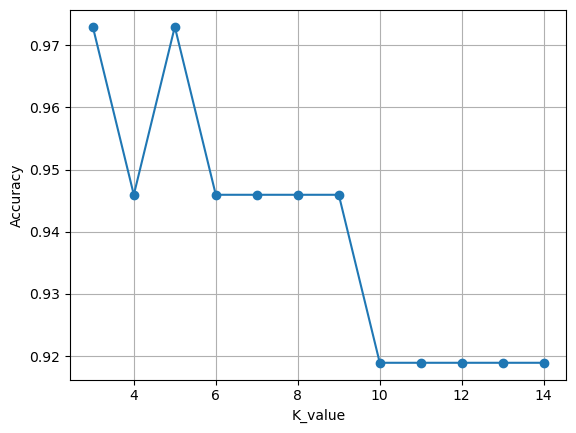

In [28]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K_value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

**Therefore Accuracy is highest for K = 3 to 5**

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy =", accuracy_score(y_test, y_pred_knn))
print("Precision =", precision_score(y_test, y_pred_knn, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_knn, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_knn, average = 'macro'))
accuracies['KNN Classifier'] = accuracy_score(y_test, y_pred_knn)

Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
Accuracy = 0.972972972972973
Precision = 0.9761904761904763
Recall = 0.9666666666666667
F1 Score = 0.9701104613385315


___
# SVM Classifier

## Linear Kernel

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Accuracy =", accuracy_score(y_test, y_pred_svc))
print("Precision =", precision_score(y_test, y_pred_svc, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_svc, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_svc, average = 'macro'))
accuracies['SVM Classifier with Linear Kernel'] = accuracy_score(y_test, y_pred_svc)

Confusion Matrix:
 [[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]
Accuracy = 0.9459459459459459
Precision = 0.9555555555555556
Recall = 0.9333333333333332
F1 Score = 0.9391534391534391


## RBF Kernel

In [33]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Accuracy =", accuracy_score(y_test, y_pred_svc))
print("Precision =", precision_score(y_test, y_pred_svc, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_svc, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_svc, average = 'macro'))
accuracies['SVM Classifier with RBF Kernel'] = accuracy_score(y_test, y_pred_svc)

Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
Accuracy = 0.972972972972973
Precision = 0.9761904761904763
Recall = 0.9666666666666667
F1 Score = 0.9701104613385315


___
# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy =", accuracy_score(y_test, y_pred_dt))
print("Precision =", precision_score(y_test, y_pred_dt, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_dt, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_dt, average = 'macro'))
accuracies['Decision Tree Classifier'] = accuracy_score(y_test, y_pred_dt)

Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]
Accuracy = 0.9459459459459459
Precision = 0.9410256410256409
Recall = 0.9410256410256409
F1 Score = 0.9410256410256409


___
# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [38]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy =", accuracy_score(y_test, y_pred_rf))
print("Precision =", precision_score(y_test, y_pred_rf, average = 'macro'))
print("Recall =", recall_score(y_test, y_pred_rf, average = 'macro'))
print("F1 Score =", f1_score(y_test, y_pred_rf, average = 'macro'))
accuracies['Random Forest Classifier'] = accuracy_score(y_test, y_pred_rf)

Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]
Accuracy = 0.9459459459459459
Precision = 0.9410256410256409
Recall = 0.9410256410256409
F1 Score = 0.9410256410256409


___
# Comparing Model Accuracies

In [39]:
print(pd.Series(accuracies))

Logistic Regression                  0.945946
KNN Classifier                       0.972973
SVM Classifier with Linear Kernel    0.945946
SVM Classifier with RBF Kernel       0.972973
Decision Tree Classifier             0.945946
Random Forest Classifier             0.945946
dtype: float64


We can see that the models having the most accuracy are KNN Classifier and SVM Classifier with RBF Kernel.